In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import time
import matplotlib.pyplot as plt
import random

In [2]:
from src.data.make_dataset import make_dataset
from src.data.dataset_loaders import AerialCarsDatasetLoader
from src.data.image_loaders import AerialCarsImageLoader
from src.features.pipelines import RawImageToFeatures
from src.features.processors import RotateToHorizontal, Resize
from src.features.descriptors import HOGDescriptor, LBPDescriptor

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


## Synchronous approach

In [12]:
start_time = time.time()

data = make_dataset(
    input_folder_filepath='../../data/interim/aerial-cars-dataset/',
    output_filepath='output_path',
    dataset_loader=AerialCarsDatasetLoader(
        image_loader=AerialCarsImageLoader()
    ),
    images_files_types=('jpg', 'JPG', 'png'),
    annotations_files_types=('txt',),
    process_pipeline=RawImageToFeatures(
        processors=[
            RotateToHorizontal(),
            Resize(
                output_size=(32, 64)
            )
        ],
        descriptors=[
            HOGDescriptor(
                orientations = 9,
                cells_per_block = (2, 2),
                pixels_per_cell = (4, 4),
                multichannel = True,
                visualize = True
            ),
            LBPDescriptor(
                bins = 256,
                range = (0, 256)
            )
        ]
    ),
    negative_images_size=(32, 64),
    negative_examples_size=0.5,
    workers=0,
    verbose=True
)

print()
print("--- %s seconds ---" % (time.time() - start_time))

INFO:src.data.make_dataset:Reading images...
100%|██████████| 31/31 [00:00<00:00, 40.47it/s]
INFO:src.data.make_dataset:Cropping cars...
100%|██████████| 15/15 [00:00<00:00, 469.15it/s]
INFO:src.data.make_dataset:Cropping random boxes...
100%|██████████| 314/314 [00:00<00:00, 13118.04it/s]
INFO:src.data.make_dataset:Processing images...
100%|██████████| 628/628 [00:24<00:00, 25.13it/s]
--- 25.82202935218811 seconds ---



In [13]:
X = list(map(lambda x: x[1], data))
y = list(map(lambda x: x[2], data))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = make_pipeline(SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        96
           1       0.97      0.86      0.91       112

    accuracy                           0.91       208
   macro avg       0.91      0.91      0.91       208
weighted avg       0.92      0.91      0.91       208

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        96
           1       0.97      0.96      0.96       112

    accuracy                           0.96       208
   macro avg       0.96      0.96      0.96       208
weighted avg       0.96      0.96      0.96       208



## Parallel approach  
Change in parameter *workers*.

In [6]:
start_time = time.time()

data = make_dataset(
    input_folder_filepath='../../data/interim/aerial-cars-dataset/',
    output_filepath='output_path',
    dataset_loader=AerialCarsDatasetLoader(
        image_loader=AerialCarsImageLoader()
    ),
    images_files_types=('jpg', 'JPG', 'png'),
    annotations_files_types=('txt',),
    process_pipeline=RawImageToFeatures(
        processors=[
            RotateToHorizontal(),
            Resize(
                output_size=(32, 64)
            )
        ],
        descriptors=[
            HOGDescriptor(
                orientations = 9,
                cells_per_block = (2, 2),
                pixels_per_cell = (4, 4),
                multichannel = True,
                visualize = True
            ),
            LBPDescriptor(
                bins = 256,
                range = (0, 256)
            )
        ]
    ),
    negative_images_size=(32, 64),
    negative_examples_size=0.5,
    workers=7,
    verbose=True
)

print()
print("--- %s seconds ---" % (time.time() - start_time))

INFO:src.data.make_dataset:Reading images...
100%|██████████| 31/31 [00:00<00:00, 38.30it/s]
INFO:src.data.make_dataset:Cropping cars...
100%|██████████| 15/15 [00:00<00:00, 549.23it/s]
INFO:src.data.make_dataset:Cropping random boxes...
100%|██████████| 314/314 [00:00<00:00, 13284.36it/s]
INFO:src.data.make_dataset:Processing images...

--- 14.62088131904602 seconds ---


In [7]:
X = list(map(lambda x: x[1], data))
y = list(map(lambda x: x[2], data))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = make_pipeline(SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        96
           1       0.84      0.96      0.90       112

    accuracy                           0.88       208
   macro avg       0.89      0.87      0.88       208
weighted avg       0.89      0.88      0.88       208

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        96
           1       0.95      0.96      0.95       112

    accuracy                           0.95       208
   macro avg       0.95      0.95      0.95       208
weighted avg       0.95      0.95      0.95       208



## Control cropping results

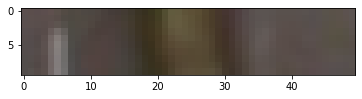

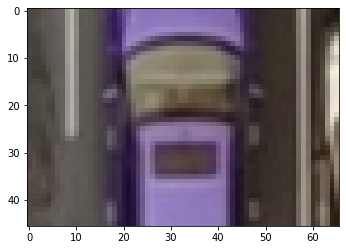

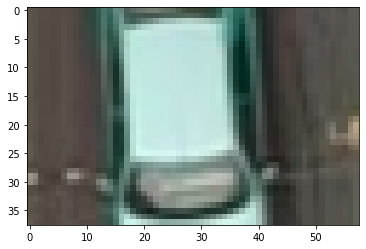

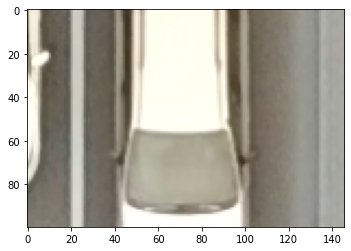

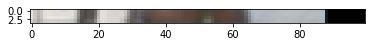

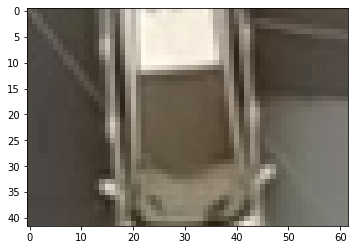

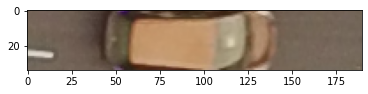

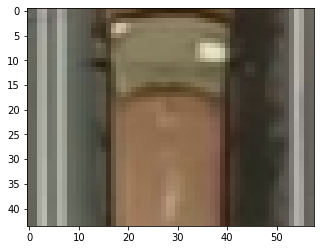

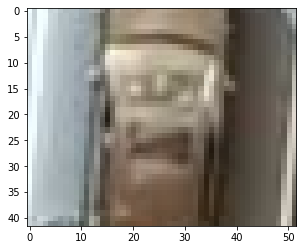

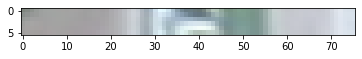

In [11]:
for image, _, _ in random.sample([d for d in data if d[2]==1], 10):
    plt.imshow(image)
    plt.show()